# Load dataset

In [164]:
import pandas as pd
post_df = pd.read_json('https://raw.githubusercontent.com/EunCheolChoi0123/COMM557Tutorial/refs/heads/main/Tutorial%2010%20Supervised%20Learning%20(2)/posts_example.json').sort_values('created_utc', ascending=True)
comment_df = pd.read_json('https://raw.githubusercontent.com/EunCheolChoi0123/COMM557Tutorial/refs/heads/main/Tutorial%2010%20Supervised%20Learning%20(2)/comments_example.json').sort_values('created_utc', ascending=True)

# Inspect and select features to use

In [ ]:
post_df.columns, comment_df.columns

(Index(['author', 'author_fullname', 'author_flair_text', 'author_premium',
        'distinguished', 'subreddit', 'subreddit_id', 'subreddit_subscribers',
        'subreddit_type', 'created_utc', 'is_robot_indexable', 'id', 'name',
        'over_18', 'title', 'selftext', 'url', 'is_self', 'post_hint', 'score',
        'ups', 'upvote_ratio'],
       dtype='object'),
 Index(['author', 'author_flair_text', 'author_fullname', 'author_premium',
        'distinguished', 'is_submitter', 'subreddit', 'subreddit_id',
        'created_utc', 'link_id', 'parent_id', 'name', 'body', 'collapsed',
        'controversiality', 'score', 'score_hidden'],
       dtype='object'))

In [ ]:
post_df[['name', 'author', 'author_premium', 'over_18', 'created_utc', 'title', 'selftext', 'score']].head()

,name,author,author_premium,over_18,created_utc,title,selftext,score
0,t3_18vkqu4,Puzzleheaded_Yam6724,0.0,False,1704068108,I want to leave binge eating in 2024,"I am addicted to salt, simple carbs, and sugar...",1
1,t3_18vlqbh,umbillionthhuman,0.0,False,1704071402,drugs. fuck. how do i escape,the only times i have gone 1 week+ without b/p...,1
2,t3_18vnf3r,OkProcedure4578,0.0,False,1704077400,Binge after edible,NYE is always depressing for me. When the edib...,1
3,t3_18vobkr,Sea_Pomegranate1122,0.0,False,1704080850,"I found this validating- TW: weight loss, medi...",I found this podcast after the holidays and de...,1
4,t3_18vozxa,Glittering-Smoke-498,0.0,False,1704083495,Can I recover while living in an unhealthy hou...,Is there any chance at all that I can recover ...,1


# Preprocessing: let's make the variables into numeric values

In [ ]:
post_df['author_premium'].value_counts()

,count
author_premium,
0.0,990
1.0,6


In [ ]:
post_df['over_18'].value_counts()

,count
over_18,
False,997
True,3


In [ ]:
post_df['over_18'] = post_df['over_18'].replace({True: 1.0, False: 0.0})
post_df['over_18']

/tmp/ipython-input-348391655.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  post_df['over_18'] = post_df['over_18'].replace({True: 1.0, False: 0.0})


,over_18
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
995,0.0
996,0.0
997,0.0
998,0.0


In [ ]:
# Some other suggested preprocessing steps

# post_df = post_df[(post_df['distinguished'] != 'moderator') & \
#                   (post_df['author'] != 'AutoModerator') & \
#                   (post_df['author'] != '[deleted]') & \
#                   (post_df['author'] != '[removed]') & \
#                   (post_df['selftext'] != '[deleted]') & \
#                   (post_df['selftext'] != '[removed]')].reset_index()

# Add network features from the comment

In [ ]:
comment_df[['link_id', 'parent_id', 'name']].head()

,link_id,parent_id,name
0,t3_18vkqu4,t3_18vkqu4,t1_kfrryb9
1,t3_18vkqu4,t3_18vkqu4,t1_kfs03gt
2,t3_18vlqbh,t3_18vlqbh,t1_kfs5xnv
3,t3_18vkqu4,t1_kfs03gt,t1_kfs7ld9
4,t3_18vlqbh,t3_18vlqbh,t1_kfsfauk


In [ ]:
comments_per_post = comment_df.groupby('link_id').size().rename('n_comments')
# Merge into post_df, fill 0 for posts with no comments
post_df = post_df.merge(comments_per_post, how='left', left_on='name', right_index=True)
post_df['n_comments'] = post_df['n_comments'].fillna(0).astype(int)
display(post_df)

,author,author_fullname,author_flair_text,author_premium,distinguished,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,created_utc,...,over_18,title,selftext,url,is_self,post_hint,score,ups,upvote_ratio,n_comments
0,Puzzleheaded_Yam6724,t2_rlq1t99q,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78695,public,1704068108,...,0.0,I want to leave binge eating in 2024,"I am addicted to salt, simple carbs, and sugar...",https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,1,1,1.00,16
1,umbillionthhuman,t2_t1lv4ggx,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78697,public,1704071402,...,0.0,drugs. fuck. how do i escape,the only times i have gone 1 week+ without b/p...,https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,1,1,1.00,5
2,OkProcedure4578,t2_a73ota22,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78700,public,1704077400,...,0.0,Binge after edible,NYE is always depressing for me. When the edib...,https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,1,1,1.00,1
3,Sea_Pomegranate1122,t2_afhya3dcb,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78702,public,1704080850,...,0.0,"I found this validating- TW: weight loss, medi...",I found this podcast after the holidays and de...,https://www.reddit.com/r/BingeEatingDisorder/c...,True,self,1,1,1.00,1
4,Glittering-Smoke-498,t2_kthis6gcr,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78704,public,1704083495,...,0.0,Can I recover while living in an unhealthy hou...,Is there any chance at all that I can recover ...,https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,1,1,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Advanced_Condition17,t2_55q3ic4lu,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80167,public,1707108485,...,0.0,I'm laying in bed rn and all I want to do is f...,So for the last two weeks I've been trying not...,https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,7,7,0.89,4
996,CasparTheGhost1,t2_4s0wzq6z,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80172,public,1707114270,...,0.0,Support and advice plz,"Tw: mention of parental death, drugs, weight, ...",https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,4,4,1.00,1
997,Whales52,t2_t8dbiy4ao,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80172,public,1707117061,...,0.0,My story and a plead for help,"To preface the situation, I'm a 20 y/o male cu...",https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,2,2,1.00,1
998,kelswelsie,t2_6xwn4urv,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80173,public,1707118158,...,0.0,binge eating has ruined me,i've been in a binge/restrict/purge cycle sinc...,https://www.reddit.com/r/BingeEatingDisorder/c...,True,None,6,6,0.73,9


In [ ]:
from collections import defaultdict

# Count comments per post
counts = comment_df.groupby("link_id").size().sort_values(ascending=False)

most_commented_post = counts.index[0]
print("Most commented post:", most_commented_post)

def build_tree_for_post(post_id, df):
    """
    Build adjacency structure (parent -> children)
    for a single post.
    """
    children = defaultdict(list)
    for _, row in df.iterrows():
        parent = row["parent_id"]
        child  = row["name"]
        children[parent].append(child)
    return children

sub = comment_df[comment_df["link_id"] == most_commented_post]
tree = build_tree_for_post(most_commented_post, sub)

def print_tree(node, children, indent=0):
    """
    Recursively print the discussion tree starting at `node`.
    """
    print("  " * indent + node)  # indent visually by level

    for child in children.get(node, []):
        print_tree(child, children, indent + 1)

print("Discussion Tree for:", most_commented_post)
print_tree(most_commented_post, tree)

Most commented post: t3_1ack4u9
Discussion Tree for: t3_1ack4u9
t3_1ack4u9
  t1_kjurf65
    t1_kjuw2rp
  t1_kjutsba
  t1_kjuuc29
    t1_kjuuwt9
    t1_kjuvz4x
    t1_kjvoz0c
    t1_kjvxgwe
  t1_kjuutjo
    t1_kjuuzy6
      t1_kjuv2rv
  t1_kjuv3jz
    t1_kjx5c4o
  t1_kjuvfei
  t1_kjuvjht
  t1_kjuwusw
  t1_kjv0p16
  t1_kjv160w
  t1_kjv1t2a
  t1_kjv20jn
    t1_kjv29zf
      t1_kjv2dob
  t1_kjv26cz
    t1_kjx3bay
  t1_kjv2rmm
  t1_kjv2rns
  t1_kjv32d1
    t1_kjvid6z
      t1_kjvl2pw
  t1_kjv3zmf
    t1_kjx2uf3
  t1_kjv8jk4
  t1_kjv96z7
  t1_kjv9t8h
  t1_kjvbsiz
  t1_kjvduty
    t1_kjx7jos
      t1_kjxvad7
  t1_kjvg0y6
  t1_kjvk628
  t1_kjvkigd
  t1_kjvm35j
  t1_kjvosjx
  t1_kjvpzif
  t1_kjvr6qf
  t1_kjvs5st
  t1_kjvuc4x
  t1_kjvxg3i
  t1_kjvyxvx
  t1_kjw3h7p
  t1_kjwfbcl
  t1_kjwftg9
  t1_kjwg2a8
  t1_kjwh15i
  t1_kjwl7qu
  t1_kjwr1fd
  t1_kjwriv9
  t1_kjwsb8e
  t1_kjx34lc
  t1_kjxbnur
  t1_kjxfx90
  t1_kjxjvox
  t1_kjxk5yn
  t1_kjxuav3
  t1_kjy1h96
  t1_kjyg7li
  t1_kjygeo3
  t1_kjyp1uz
 

In [ ]:
def compute_depth(node, children):
    """
    Depth = 0 if no children.
    Otherwise depth = 1 + max depth of any child.
    """
    if node not in children or len(children[node]) == 0:
        return 0
    return 1 + max(compute_depth(child, children) for child in children[node])

depth = compute_depth(most_commented_post, tree)
print("Tree depth:", depth)


Tree depth: 3


In [ ]:
from collections import defaultdict

def compute_width(node, children):
    """
    Compute width by collecting number of nodes at each depth level.
    """
    level_counts = defaultdict(int)

    def traverse(n, level):
        level_counts[level] += 1
        for child in children.get(n, []):
            traverse(child, level + 1)

    traverse(node, 0)
    return max(level_counts.values()), dict(level_counts)

width, level_counts = compute_width(most_commented_post, tree)

print("Tree width:", width)
print("Nodes at each level:", level_counts)


Tree width: 54
Nodes at each level: {0: 1, 1: 54, 2: 13, 3: 4}


In [ ]:
# Compute depth & width for all posts and merge into post_df

tree_stats = []   # will store tuples of (post_id, depth, width)

# Group comments by link_id so we process each post independently
groups = comment_df.groupby("link_id")

for post_id, sub in groups:
    # Build tree
    children = build_tree_for_post(post_id, sub)

    # Compute depth
    depth = compute_depth(post_id, children)

    # Compute width
    width, _ = compute_width(post_id, children)

    tree_stats.append((post_id, depth, width))

# Create a DataFrame from results
tree_df = (
    pd.DataFrame(tree_stats, columns=["name", "tree_depth", "tree_width"])
    .set_index("name")
)

In [ ]:
# Merge into post_df (fill zeros for posts with no comments)
post_df = post_df.merge(tree_df, how="left", left_on="name", right_index=True)

post_df["tree_depth"] = post_df["tree_depth"].fillna(0).astype(int)
post_df["tree_width"] = post_df["tree_width"].fillna(0).astype(int)


In [ ]:
post_df[["name", "n_comments", "tree_depth", "tree_width"]].head()

,name,n_comments,tree_depth,tree_width
0,t3_18vkqu4,16,6,7
1,t3_18vlqbh,5,2,3
2,t3_18vnf3r,1,1,1
3,t3_18vobkr,1,1,1
4,t3_18vozxa,1,1,1


# Add linguistic features

In [ ]:
from transformers import pipeline
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/329M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
/usr/local/lib/python3.12/dist-packages/transformers/pipelines/text_classification.py:111: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
classifier(["I love this!", "I hate this!"])

[[{'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'disgust', 'score': 0.001611991785466671},
  {'label': 'fear', 'score': 0.00041385178337804973},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'sadness', 'score': 0.0020923891570419073},
  {'label': 'surprise', 'score': 0.00852868054062128}],
 [{'label': 'anger', 'score': 0.6189563274383545},
  {'label': 'disgust', 'score': 0.3279281258583069},
  {'label': 'fear', 'score': 0.00426805205643177},
  {'label': 'joy', 'score': 0.0026416885666549206},
  {'label': 'neutral', 'score': 0.01455705426633358},
  {'label': 'sadness', 'score': 0.025817126035690308},
  {'label': 'surprise', 'score': 0.005831682123243809}]]

In [ ]:
import numpy as np
import pandas as pd

def classify_one(text):
    """
    Run the classifier on a single text string
    and return a dict like:
    {'joy': 0.97, 'anger': 0.01, ...}
    """
    if not isinstance(text, str) or text.strip() == "":
        # handle empty/missing text
        return {}

    result = classifier([text])[0]   # classifier always returns list-of-list
    return {d['label']: d['score'] for d in result}

emotion_dicts = post_df['title'].apply(classify_one)
emotion_df = emotion_dicts.apply(pd.Series)
post_df = pd.concat([post_df, emotion_df], axis=1)
display(post_df)

You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


,author,author_fullname,author_flair_text,author_premium,distinguished,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,created_utc,...,n_comments,tree_depth,tree_width,anger,disgust,fear,joy,neutral,sadness,surprise
0,Puzzleheaded_Yam6724,t2_rlq1t99q,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78695,public,1704068108,...,16,6,7,0.012789,0.044114,0.007575,0.009309,0.188120,0.731158,0.006934
1,umbillionthhuman,t2_t1lv4ggx,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78697,public,1704071402,...,5,2,3,0.830623,0.016301,0.023697,0.002980,0.007644,0.104113,0.014641
2,OkProcedure4578,t2_a73ota22,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78700,public,1704077400,...,1,1,1,0.024455,0.845011,0.005325,0.003767,0.109918,0.005774,0.005751
3,Sea_Pomegranate1122,t2_afhya3dcb,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78702,public,1704080850,...,1,1,1,0.013140,0.010212,0.001310,0.306072,0.624056,0.005696,0.039513
4,Glittering-Smoke-498,t2_kthis6gcr,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,78704,public,1704083495,...,1,1,1,0.016826,0.276701,0.105016,0.004146,0.277156,0.293395,0.026760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Advanced_Condition17,t2_55q3ic4lu,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80167,public,1707108485,...,4,2,2,0.117351,0.008874,0.002337,0.101455,0.069616,0.680126,0.020239
996,CasparTheGhost1,t2_4s0wzq6z,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80172,public,1707114270,...,1,1,1,0.011943,0.007201,0.018670,0.014363,0.885152,0.058084,0.004587
997,Whales52,t2_t8dbiy4ao,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80172,public,1707117061,...,1,1,1,0.193638,0.004531,0.175098,0.036852,0.084214,0.492623,0.013046
998,kelswelsie,t2_6xwn4urv,NaN,0.0,NaN,BingeEatingDisorder,t5_33q99,80173,public,1707118158,...,9,3,5,0.018917,0.026956,0.003812,0.002610,0.026187,0.912156,0.009361


In [ ]:
!pip install detoxify
from detoxify import Detoxify

# to specify the device the model will be allocated on (defaults to cpu), accepts any torch.device input

model = Detoxify('original', device='cuda')
results = Detoxify('original').predict(['example text', 'heck yeah'])
results

Downloading: "https://github.com/unitaryai/detoxify/releases/download/v0.1-alpha/toxic_original-c1212f89.ckpt" to /root/.cache/torch/hub/checkpoints/toxic_original-c1212f89.ckpt


100%|██████████| 418M/418M [00:01<00:00, 269MB/s]


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'toxicity': [0.000647830602247268, 0.05367329716682434],
 'severe_toxicity': [0.00012098374281777069, 0.0004102094389963895],
 'obscene': [0.00018694325990509242, 0.01170341856777668],
 'threat': [0.0001162407934316434, 0.0001824864448281005],
 'insult': [0.00018111873941961676, 0.0012507048668339849],
 'identity_attack': [0.00014001900854054838, 0.0002444809360895306]}

In [ ]:
def toxicity_one(text):
    """
    Run Detoxify on a single text and return:
    {'toxicity': 0.00, 'severe_toxicity': 0.00, ..., 'identity_attack': 0.00}
    """
    if not isinstance(text, str) or text.strip() == "":
        return {}

    out = model.predict([text])   # returns dict of lists
    return {k: v[0] for k, v in out.items()}

tox_dicts = post_df['selftext'].apply(toxicity_one)


In [ ]:
tox_df = tox_dicts.apply(pd.Series)
post_df = pd.concat([post_df, tox_df], axis=1)

tox_cols = ['toxicity','severe_toxicity','obscene','threat','insult','identity_attack']
post_df[tox_cols] = post_df[tox_cols].fillna(0)

In [ ]:
display(post_df[tox_cols])

,toxicity,severe_toxicity,obscene,threat,insult,identity_attack
0,0.009208,0.000128,0.000599,0.000192,0.000523,0.000323
1,0.126472,0.001246,0.113598,0.000785,0.010245,0.001256
2,0.014552,0.000139,0.000821,0.000262,0.000627,0.000296
3,0.003418,0.000111,0.000402,0.000165,0.000290,0.000174
4,0.032538,0.000294,0.005105,0.000312,0.002128,0.000542
...,...,...,...,...,...,...
995,0.081909,0.000756,0.060651,0.000545,0.004562,0.000634
996,0.008215,0.000142,0.000869,0.000171,0.000465,0.000241
997,0.012416,0.000302,0.003963,0.000259,0.001093,0.000417
998,0.022165,0.000155,0.001820,0.000284,0.000864,0.000281


# Define Target variable

In [ ]:
post_df['score'].describe()

,score
count,1000.000000
mean,10.848000
std,26.217174
min,1.000000
25%,1.000000
50%,4.000000
75%,10.000000
max,555.000000


In [ ]:
post_df['high_score'] = post_df['score'].apply(lambda x: 1 if x > 4 else 0)
post_df['high_score'].value_counts()

,count
high_score,
0,519
1,481


In [ ]:
import numpy as np

post_df['log_score'] = np.log10(post_df['score'])
post_df['log_score'].describe()

,log_score
count,1000.000000
mean,0.637782
std,0.545848
min,0.000000
25%,0.000000
50%,0.602060
75%,1.000000
max,2.744293


# Now you are ready to make predictions

In [ ]:
author_column = ['author_premium', 'over_18']
comment_column = ['n_comments', 'tree_depth', 'tree_width']
emotion_column = ['joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise']
toxicity_column = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']
classification_column = ['high_score']
regression_column = ['log_score']

In [ ]:
post_df[author_column + comment_column + emotion_column + toxicity_column + classification_column + regression_column]

post_df.to_json('task.json')

# (1) Supervised Learning - Classification

In [ ]:
!pip install catboost
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


In [ ]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import shap

# Load and inspect dataset

In [ ]:
post_df = pd.read_json('https://raw.githubusercontent.com/EunCheolChoi0123/COMM557Tutorial/refs/heads/main/Tutorial%2010%20Supervised%20Learning%20(2)/task.json')
metrics_dict = {}

In [ ]:
author_column = ['author_premium', 'over_18']
comment_column = ['n_comments', 'tree_depth', 'tree_width']
emotion_column = ['joy', 'anger', 'fear', 'sadness', 'disgust', 'surprise']
toxicity_column = ['toxicity', 'severe_toxicity', 'obscene', 'threat', 'insult', 'identity_attack']
classification_column = ['high_score']
regression_column = ['log_score']

df = post_df[author_column + comment_column + emotion_column + toxicity_column + classification_column]

In [ ]:
df['Label'] = df['high_score']
df.drop('high_score', axis=1, inplace=True)

/tmp/ipython-input-3990896340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Label'] = df['high_score']
/tmp/ipython-input-3990896340.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('high_score', axis=1, inplace=True)


In [ ]:
df.describe()

,author_premium,over_18,n_comments,tree_depth,tree_width,joy,anger,fear,sadness,disgust,surprise,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,Label
count,996.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006024,0.003000,6.209000,2.001000,3.543000,0.059670,0.076046,0.080208,0.200902,0.099199,0.087938,0.065241,0.001371,0.043069,0.000792,0.007072,0.000618,0.481000
std,0.077420,0.054717,9.155061,2.067674,4.603188,0.166423,0.166578,0.176403,0.291618,0.193187,0.147078,0.172028,0.012323,0.155924,0.005972,0.036878,0.001741,0.499889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000289,0.000596,0.000241,0.001054,0.000317,0.000478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,0.002847,0.008609,0.004889,0.014058,0.007193,0.010443,0.001610,0.000106,0.000216,0.000120,0.000209,0.000160,0.000000
50%,0.000000,0.000000,3.000000,1.000000,2.000000,0.006081,0.017076,0.013755,0.048553,0.022285,0.032258,0.006581,0.000119,0.000522,0.000159,0.000401,0.000220,0.000000
75%,0.000000,0.000000,7.000000,3.000000,4.000000,0.019615,0.044929,0.057567,0.272909,0.074990,0.085113,0.028420,0.000186,0.001683,0.000319,0.001116,0.000416,1.000000
max,1.000000,1.000000,71.000000,29.000000,54.000000,0.991900,0.987772,0.991445,0.993207,0.985681,0.939004,0.995224,0.356856,0.978909,0.137096,0.562472,0.038714,1.000000


In [ ]:
display(df.dtypes)

,0
author_premium,float64
over_18,int64
n_comments,int64
tree_depth,int64
tree_width,int64
joy,float64
anger,float64
fear,float64
sadness,float64
disgust,float64


In [ ]:
df['over_18'] = df['over_18'].astype(float)

/tmp/ipython-input-1105225729.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['over_18'] = df['over_18'].astype(float)


In [ ]:
df['author_premium'] = df['author_premium'].fillna(0)

/tmp/ipython-input-2952977147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['author_premium'] = df['author_premium'].fillna(0)


In [ ]:
# Columns to be scaled
cols_to_be_scaled = ['n_comments','tree_depth','tree_width']
df[cols_to_be_scaled] = df[cols_to_be_scaled].astype(float)

#sc = StandardScaler()
#df[cols_to_be_scaled] = sc.fit_transform(df[cols_to_be_scaled])
df.loc[:, cols_to_be_scaled] = np.log10(df[cols_to_be_scaled] + 1)

/tmp/ipython-input-3450809151.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_be_scaled] = df[cols_to_be_scaled].astype(float)


In [ ]:
df.describe()

,author_premium,over_18,n_comments,tree_depth,tree_width,joy,anger,fear,sadness,disgust,surprise,toxicity,severe_toxicity,obscene,threat,insult,identity_attack,Label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006000,0.003000,0.626447,0.403496,0.510224,0.059670,0.076046,0.080208,0.200902,0.099199,0.087938,0.065241,0.001371,0.043069,0.000792,0.007072,0.000618,0.481000
std,0.077266,0.054717,0.434206,0.248867,0.345225,0.166423,0.166578,0.176403,0.291618,0.193187,0.147078,0.172028,0.012323,0.155924,0.005972,0.036878,0.001741,0.499889
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000289,0.000596,0.000241,0.001054,0.000317,0.000478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.301030,0.301030,0.301030,0.002847,0.008609,0.004889,0.014058,0.007193,0.010443,0.001610,0.000106,0.000216,0.000120,0.000209,0.000160,0.000000
50%,0.000000,0.000000,0.602060,0.301030,0.477121,0.006081,0.017076,0.013755,0.048553,0.022285,0.032258,0.006581,0.000119,0.000522,0.000159,0.000401,0.000220,0.000000
75%,0.000000,0.000000,0.903090,0.602060,0.698970,0.019615,0.044929,0.057567,0.272909,0.074990,0.085113,0.028420,0.000186,0.001683,0.000319,0.001116,0.000416,1.000000
max,1.000000,1.000000,1.857332,1.477121,1.740363,0.991900,0.987772,0.991445,0.993207,0.985681,0.939004,0.995224,0.356856,0.978909,0.137096,0.562472,0.038714,1.000000


# Correlation matrix

<Axes: >

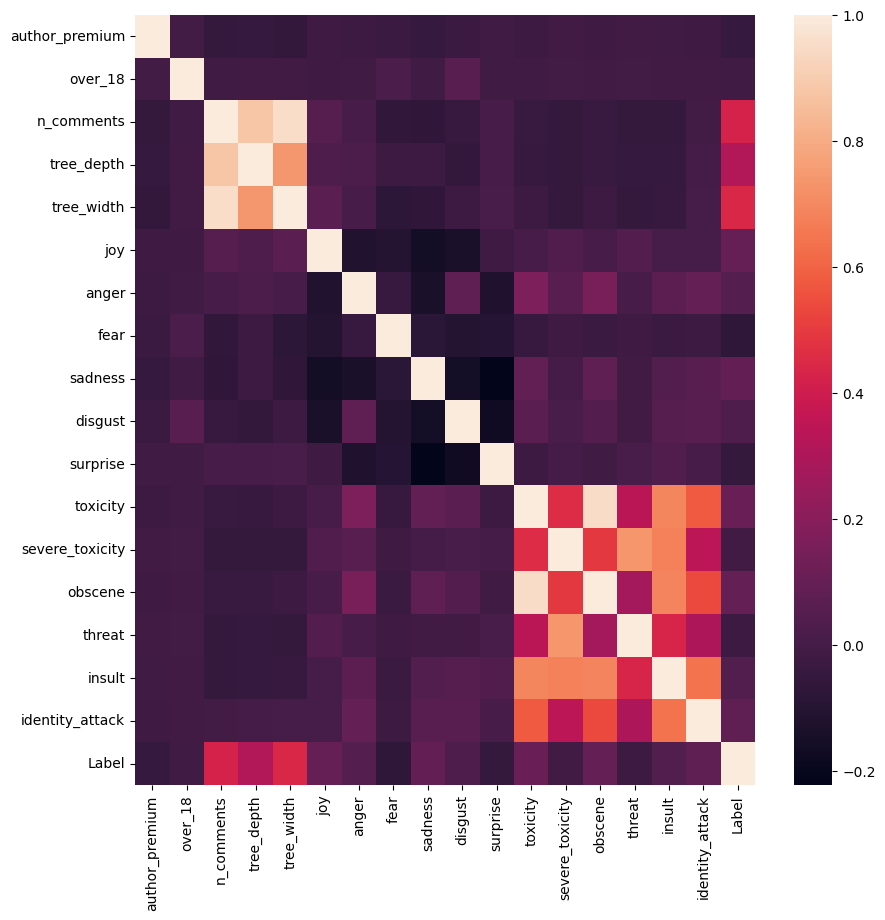

In [ ]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

# Plot Correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(corr)

# Train-test split
- When imbalanced, oversampling is a good strategy when there are few data points, while undersampling is good when there are potentially many similar data points.
- https://developers.google.com/machine-learning/crash-course/overfitting/imbalanced-datasets

In [ ]:
# Train Test Split
X = df.drop('Label',axis=1)
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression/Linear models
- StatQuest Logistic Regression, Regularization (playlist): https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe

In [ ]:
log_model = LogisticRegression(solver='newton-cg')
log_model.fit(X_train, y_train)
log_preds = log_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, log_preds))
classification_report_log = classification_report(y_test, log_preds, output_dict=True)

metrics_dict['logistic_regression'] = classification_report_log

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       103
           1       0.71      0.74      0.73        97

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



In [ ]:
## Ridge Classifier
ridge_model = RidgeClassifier()
ridge_model.fit(X_train, y_train)
ridge_preds = ridge_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, ridge_preds))
classification_report_ridge = classification_report(y_test, ridge_preds, output_dict=True)

metrics_dict['ridge_regression'] = classification_report_ridge

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.74      0.75       103
           1       0.73      0.74      0.73        97

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



In [ ]:
## Lasso Regression
lasso_model = LogisticRegression(penalty='l1',solver='liblinear')
lasso_model.fit(X_train, y_train)
lasso_preds = lasso_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, lasso_preds))
classification_report_lasso = classification_report(y_test, lasso_preds, output_dict=True)

metrics_dict['lasso_regression'] = classification_report_lasso

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73       103
           1       0.71      0.74      0.73        97

    accuracy                           0.73       200
   macro avg       0.73      0.73      0.73       200
weighted avg       0.73      0.73      0.73       200



# Tree Models
- StatQuest Decision Trees (playlist): https://www.youtube.com/watch?v=_L39rN6gz7Y&list=PLblh5JKOoLUKAtDViTvRGFpphEc24M-QH
- StatQuest Random Forest (playlist): https://www.youtube.com/watch?v=J4Wdy0Wc_xQ&list=PLblh5JKOoLUIE96dI3U7oxHaCAbZgfhHk

In [ ]:
## Decision Tree

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
dec_tree_preds = dec_tree.predict(X_test)
print("Classification Report:\n", classification_report(y_test, dec_tree_preds))
classification_report_dec = classification_report(y_test, dec_tree_preds, output_dict=True)

metrics_dict['decision_tree'] = classification_report_dec

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.65      0.64       103
           1       0.62      0.60      0.61        97

    accuracy                           0.62       200
   macro avg       0.62      0.62      0.62       200
weighted avg       0.62      0.62      0.62       200



In [ ]:
## Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
print("Classification Report:\n", classification_report(y_test, rf_preds))
classification_report_rf = classification_report(y_test, rf_preds, output_dict=True)

metrics_dict['random_forest'] = classification_report_rf

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       103
           1       0.76      0.76      0.76        97

    accuracy                           0.77       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.77      0.77      0.77       200



# Gradient-boosted trees
- StatQuest Gradient Boosting (playlist): https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6

In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Check if GPU is available
try:
    import cupy as cp
    print("CuPy is available, using GPU for XGBoost.")
    xgb_model = xgb.XGBClassifier(tree_method = "hist", device = "cuda")  # Use GPU for XGBoost
except ImportError:
    print("CuPy not found. Using CPU for XGBoost.")
    xgb_model = xgb.XGBClassifier()

# Random hyperparameter sweeping (modified to use the defined xgb_model)
param_dist = {
    'max_depth': stats.randint(3, 10),
    'learning_rate': stats.uniform(0.01, 0.1),
    'subsample': stats.uniform(0.5, 0.5),
    'n_estimators': stats.randint(50, 200)
}

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)

print("Best set of hyperparameters: ", random_search.best_params_)
print("Best score: ", random_search.best_score_)

CuPy is available, using GPU for XGBoost.
Best set of hyperparameters:  {'learning_rate': np.float64(0.10255326666179189), 'max_depth': 3, 'n_estimators': 92, 'subsample': np.float64(0.8073251462899331)}
Best score:  0.7212500000000001


In [ ]:
# Train the XGBoost model with the best hyperparameters
best_xgb_model = xgb.XGBClassifier(**random_search.best_params_)
best_xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_preds = best_xgb_model.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, xgb_preds))
classification_report_xgb = classification_report(y_test, xgb_preds, output_dict=True)
metrics_dict['xgboost'] = classification_report_xgb

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.71      0.70       103
           1       0.68      0.66      0.67        97

    accuracy                           0.69       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.69      0.68       200



In [ ]:
# Define the hyperparameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'depth': [4, 6, 8],  # Depth of the trees
    'l2_leaf_reg': [1, 3, 5],  # L2 regularization term on weights of leaves
    'border_count': [32, 64, 128], # Number of splits for numerical features
    'random_strength': [1, 5, 10] # Random strength for bagging
}

# Initialize CatBoostClassifier with task_type='GPU' for GPU usage
catboost_model = CatBoostClassifier(task_type='GPU', verbose=0)

# Perform RandomizedSearchCV for hyperparameter tuning
random_search_catboost = RandomizedSearchCV(
    estimator=catboost_model,
    param_distributions=param_grid,
    n_iter=5,  # Number of random combinations to try
    cv=3,  # Number of cross-validation folds
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Fit the model with the training data
random_search_catboost.fit(X_train, y_train)


# Get the best hyperparameters and train the final model
best_params = random_search_catboost.best_params_
print("Best hyperparameters:", best_params)


best_catboost_model = CatBoostClassifier(**best_params, task_type="GPU", verbose=0)
best_catboost_model.fit(X_train, y_train)


# Make predictions on the test data
catboost_preds = best_catboost_model.predict(X_test)

# Evaluate the model
print("Classification Report (CatBoost):\n", classification_report(y_test, catboost_preds))

classification_report_catboost = classification_report(y_test, catboost_preds, output_dict=True)
metrics_dict['catboost'] = classification_report_catboost

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best hyperparameters: {'random_strength': 1, 'learning_rate': 0.01, 'l2_leaf_reg': 1, 'iterations': 200, 'depth': 4, 'border_count': 64}
Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.74      0.73      0.73       103
           1       0.71      0.72      0.72        97

    accuracy                           0.72       200
   macro avg       0.72      0.72      0.72       200
weighted avg       0.73      0.72      0.73       200



# Explanable AI (XAI)
- Feature importance: "they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree." (https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)
- Permutation importance: "randomly shuffling the values of a single feature and observing the resulting degradation of the model’s score" (https://scikit-learn.org/1.5/modules/permutation_importance.html)
- SHAP values: In this visualization, each data point corresponds to a sample. The horizontal position of a point reflects its influence on the model's output, while its color, ranging from blue to red, signifies the feature's magnitude from low to high. (https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html)

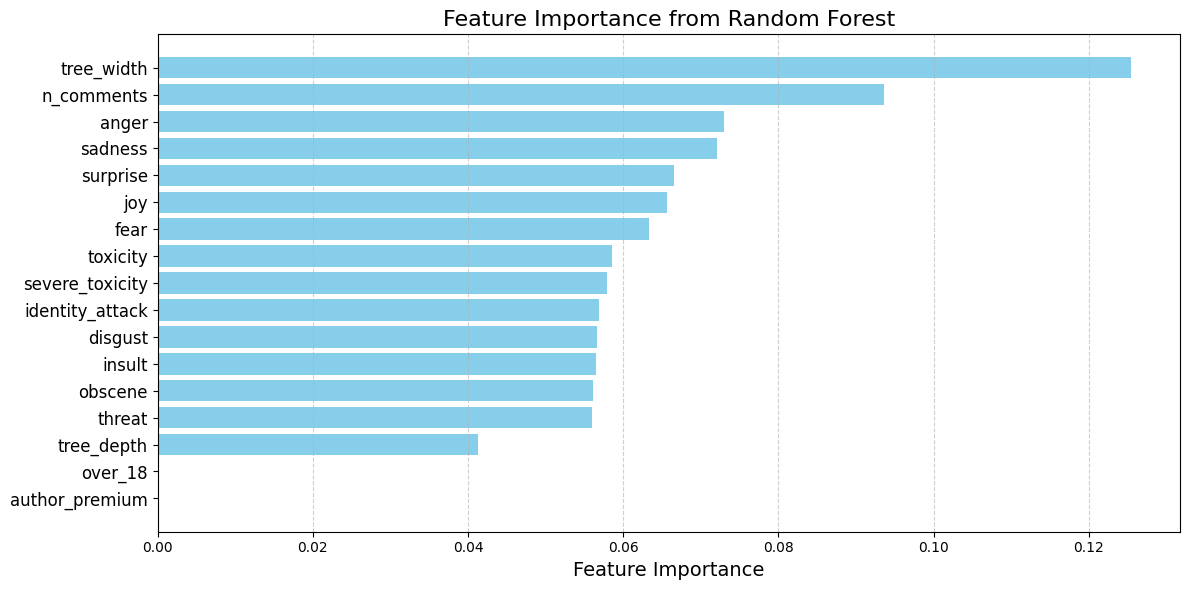

In [ ]:
feature_importance = rf_model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]  # Sort in descending order

fig = plt.figure(figsize=(12, 6))
# Use feature_importance directly instead of feature_importance.importances_mean
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx], fontsize=12)
plt.xlabel('Feature Importance', fontsize=14) # Changed label to reflect the data being plotted
plt.title('Feature Importance from Random Forest', fontsize=16) # Changed title to be more specific
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

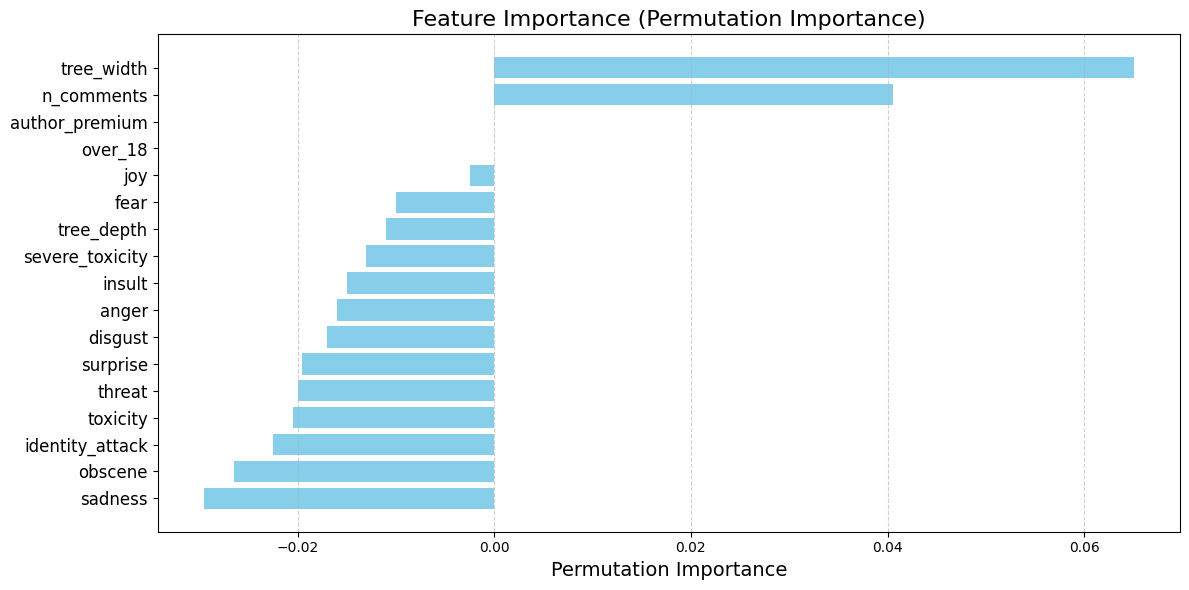

In [ ]:
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()[::-1]  # Sort in descending order

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center', color='skyblue')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx], fontsize=12)
plt.xlabel('Permutation Importance', fontsize=14)
plt.title('Feature Importance (Permutation Importance)', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show highest importance at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

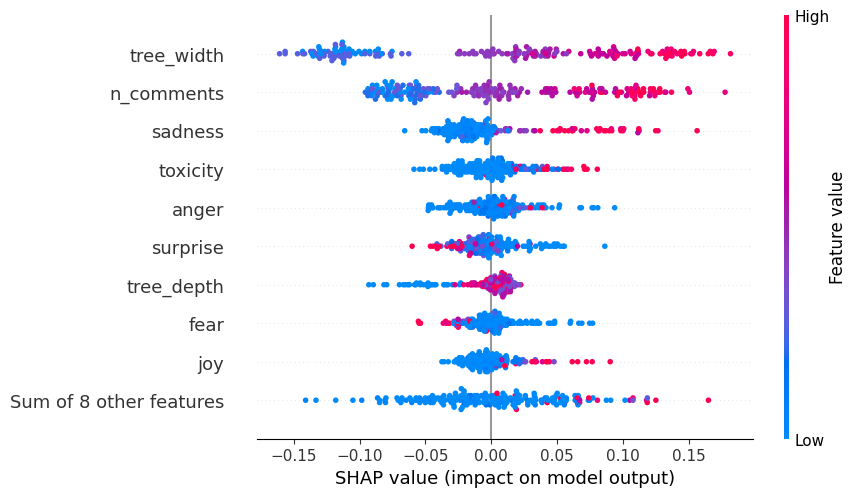

In [ ]:
import shap

explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

# select output 1 for binary classification
shap_class1 = shap_values[:, :, 1]

shap.plots.beeswarm(shap_class1, max_display=10)


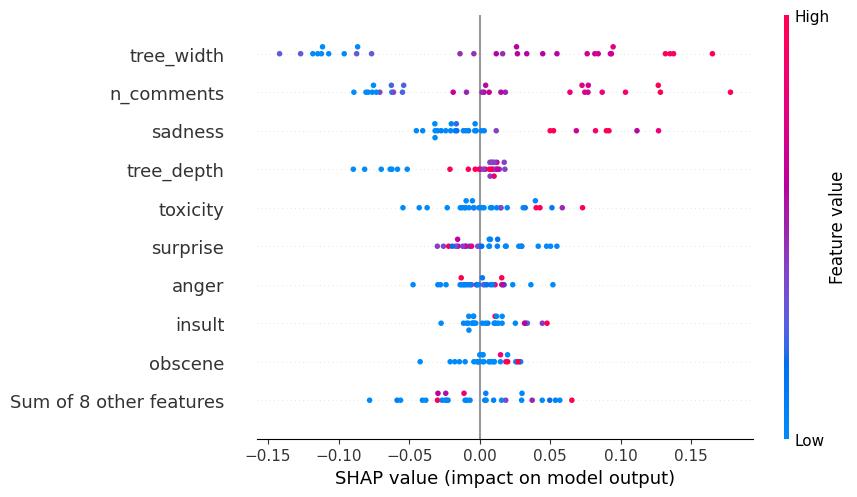

In [ ]:
import shap

X_sample = X_test.sample(30, random_state=42)

explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_sample)

shap_class1 = shap_values[:, :, 1]

shap.plots.beeswarm(shap_class1, max_display=10)


# (2) Supervised Learning - Regression

In [ ]:
post_df = pd.read_json('task.json')

In [ ]:
df = post_df[author_column + comment_column + emotion_column + toxicity_column + regression_column]

In [ ]:
# Train Test Split
X = df.drop('log_score',axis=1)
y = df['log_score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

## Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
)
import numpy as np

y_pred = rf_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"R²: {r2:.3f}")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")

R²: 0.215
MAE: 0.394
RMSE: 0.492


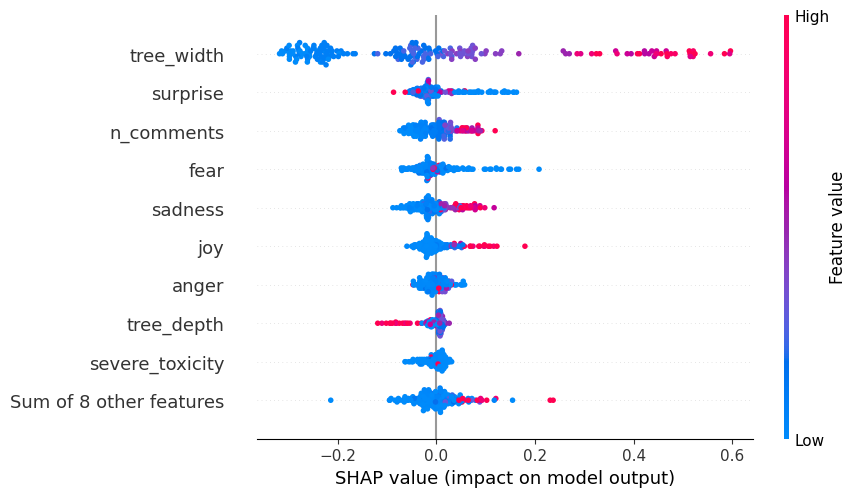

In [ ]:
import shap

explainer = shap.Explainer(rf_model, X_train)
shap_values = explainer(X_test)

shap.plots.beeswarm(shap_values, max_display=10)
